In [210]:
using Plots, Statistics, NaNStatistics, LinearAlgebra, Serialization, ParticleFilters, StatsBase

include("../utils/import.jl")
using .Import

include("../utils/figs.jl")
using .Figs

# Fig 1

Discounted reward on standard horizon across all algorithms.

State Criteria:
* E[C1] > E[C2] > E[C3]
* all arms stochastic (none deterministic)

State IDs: 
- 1217
- 1226
- 1235
- 1245
- 4586
- 4589
- 4629
- 4638
- 4641
- 1572
- 1712
- 3191
- 3204
- 3437
- 3446
- 3514
- 3526
- 3616
- 4151
- 4426

In [2]:
# Experiment Parameters
runs = 25
actions = ["C1", "C2", "C3", "B1", "B2", "B3"]
pomdp_name, naive_name, random_name, passive_name = "ATS", "Naive", "Random", "Passive";

# Plotting Parameters
labels = [pomdp_name naive_name random_name passive_name]
discount = 0.999

# ATS
pomdp_expIDs = ["22128_"*x for x in ["051526", "055025", "06251", "07242", "075856", "083337", "09080", "100546", "10400", "113044", "120617", "130613", "13588", "143446", "15378", "161233", "164944", "174134", "184340", "192058"]]

# Naive
naive_expIDs1 = ["base_naive_22127_194"*x for x in ["857", "913", "929", "945"]]
naive_expIDs2 = ["base_naive_22127_195"*x for x in ["01", "017", "033", "049", "15", "120", "136", "152", "28", "224", "240", "255", "311", "327", "343", "358"]]
naive_expIDs = cat(naive_expIDs1, naive_expIDs2, dims=1)

# Random
random_expIDs1 = ["base_rand_act_22127_"*x for x in ["195414", "210743", "212754", "220210", "222350", "225925", "232037", "234123"]]
random_expIDs2 = ["base_rand_act_22128_"*x for x in ["002527", "00453", "010439", "013758", "015719", "021655", "02377", "030644", "033715", "035652", "042637", "044617"]]
random_expIDs = cat(random_expIDs1, random_expIDs2, dims=1)

# Passive
passive_expIDs1 = ["base_rand_B_22127_"*x for x in ["195418", "210747", "212758", "220214", "222355", "225929", "232041", "234127"]]
passive_expIDs2 = ["base_rand_B_22128_"*x for x in ["002530", "00457", "010443", "01382", "015722", "021659", "023711", "030648", "033718", "035655", "042641", "044621"]]
passive_expIDs = cat(passive_expIDs1, passive_expIDs2, dims=1)

# Import Data
s_p, t_p, a_p, r_p = Import.import_IDs(pomdp_expIDs, runs)
s_n, t_n, a_n, r_n = Import.import_IDs(naive_expIDs, runs)
s_r, t_r, a_r, r_r = Import.import_IDs(random_expIDs, runs)
s_pa, t_pa, a_pa, r_pa = Import.import_IDs(passive_expIDs, runs)
;

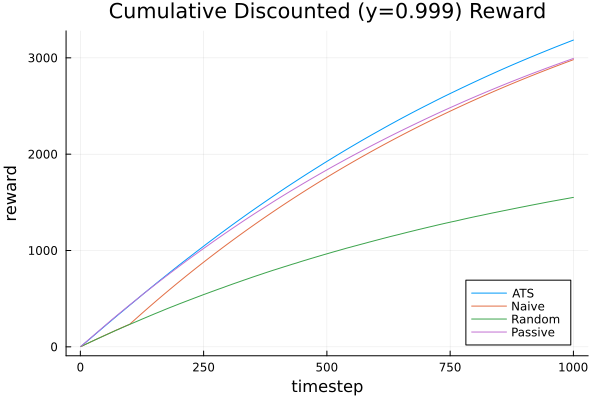

In [3]:
Figs.plot_cumulative_avg_r_multiple_experiments([r_p, r_n, r_r, r_pa], discount, labels, "Cumulative Discounted (y="*string(discount)*") Reward")

# Fig 2

Teacher queries on standard horizon across all algorithms.

State Criteria:
* E[C1] > E[C2] > E[C3]
* all arms stochastic (none deterministic)

State IDs: 
- 1217
- 1226
- 1235
- 1245
- 4586
- 4589
- 4629
- 4638
- 4641
- 1572
- 1712
- 3191
- 3204
- 3437
- 3446
- 3514
- 3526
- 3616
- 4151
- 4426


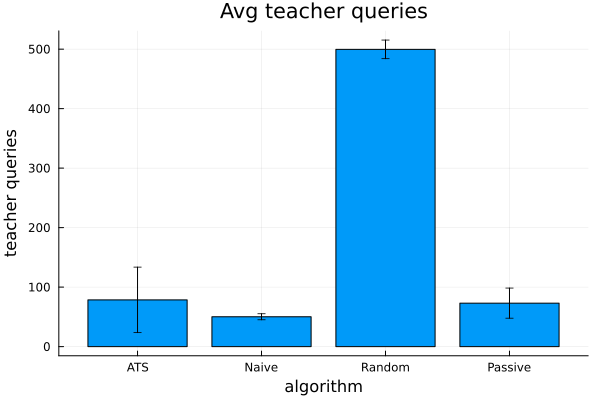

In [4]:
Figs.plot_num_teacher_queries([a_p, a_n, a_r, a_pa], labels, "Avg teacher queries")

# Fig 3

Performance (avg R over last 100 timesteps) across long-horizon large state-space experiments.

State criteria:
* E[C1] > E[C2] >= E[C3]
* all arms stochastic (none deterministic)
* all arms different

States:
- 724392
- 933951
- 265614

In [91]:
# Experiment Parameters
runs = 5
actions = ["C1", "C2", "C3", "B1", "B2", "B3"]
interesting_run = 1

# Long-Horizon IDs
long_expIDs = ["23123_"*x for x in ["15073", "152454", "155047"]]

# Import Data - take ~9min
s_l1, t_l1, a_l1, r_l1, beliefs_1, final_states_1, avg_belief_1 = Import.import_experiment(long_expIDs[1], runs)
s_l2, t_l2, a_l2, r_l2, beliefs_2, final_states_2, avg_belief_2 = Import.import_experiment(long_expIDs[2], runs)
s_l3, t_l3, a_l3, r_l3, beliefs_3, final_states_3, avg_belief_3 = Import.import_experiment(long_expIDs[3], runs)
;

In [208]:
s_l = cat(s_l1[1], s_l2[1], s_l3[1], dims=1)
t_l = cat(t_l1, t_l2, t_l3, dims=1)
a_l = cat(a_l1, a_l2, a_l3, dims=1)
r_l = cat(r_l1, r_l2, r_l3, dims=1)
final_states = cat(final_states_1, final_states_2, final_states_3, dims=1)
;

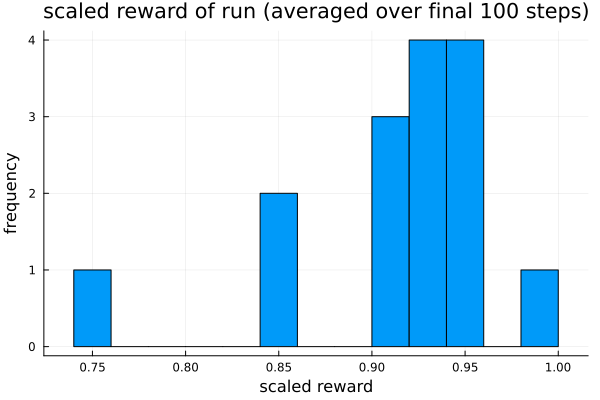

In [107]:
Figs.plot_final_reward_frequency(r_l, s_l, runs)

# Fig 4

**TODO: Make this a picture somehow**

Comparison of inferred state and true state for "interesting run".

State criteria:
* hand-selected from long-horizon large state-space experiments

In [119]:
function print_state(s::Main.Import.State)
    println("\t u: ", s.u)
    println("\t d1: ", s.d[1], "\t (exp val ", dot(s.u, s.d[1]), ")")
    println("\t d1: ", s.d[2], "\t (exp val ", dot(s.u, s.d[2]), ")")
    println("\t d1: ", s.d[3], "\t (exp val ", dot(s.u, s.d[3]), ")")
end

print_state (generic function with 2 methods)

In [122]:
println("True State:")
print_state(s_l[interesting_run])

println("\nInferred State:")
print_state(final_states_1[interesting_run])

True State:
	 u: [10.0, 10.0, 6.0]
	 d1: [0.4, 0.6, 0.0]	 (exp val 10.0)
	 d1: [0.4, 0.2, 0.39999999999999997]	 (exp val 8.4)
	 d1: [0.2, 0.2, 0.6000000000000001]	 (exp val 7.6000000000000005)

Inferred State:
	 u: [4.0, 0.0, 0.0]
	 d1: [0.4, 0.6, 0.0]	 (exp val 1.6)
	 d1: [0.2, 0.2, 0.6000000000000001]	 (exp val 0.8)
	 d1: [0.2, 0.2, 0.6000000000000001]	 (exp val 0.8)


# Fig 5

Belief in inferred state over training.

State criteria:
* hand-selected from long-horizon large state-space experiments

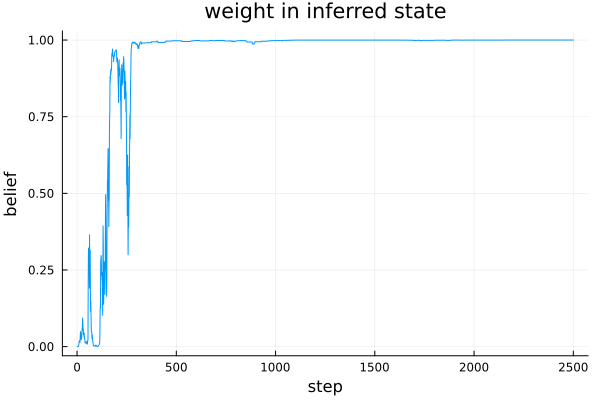

In [140]:
belief = [pdf(b, final_states_1[interesting_run]) for b in beliefs_1[interesting_run]]
plot(belief, legend=false, xlabel="step", yaxis="belief", title="weight in inferred state")

# Fig 6
Accuracy in u estimates v. accuracy in d estimates.

State criteria:
* hand-selected from long-horizon large state-space experiments

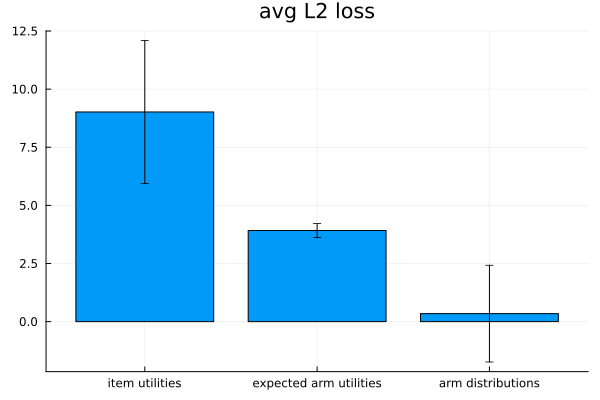

In [211]:
Figs.plot_inferred_state_loss(final_states, s_l)